In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

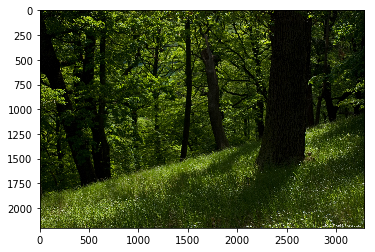

In [3]:
img = mpimg.imread('../data/forest2.jpg')
plt.imshow(img)

In [4]:
city_list = list()
forest_list = list()

for i in range(10):
    img = mpimg.imread('../data/forest' + str(i) + '.jpg')
    forest_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

    img = mpimg.imread('../data/city' + str(i) + '.jpg')
    city_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])


In [5]:
city_list    

[[152.92604073522105, 179.46239443616494],
 [155.31552906110284, 123.29601589667163],
 [145.87876783333334, 139.38609216666666],
 [107.38227113795296, 117.66350127145581],
 [136.26500258151634, 133.30994082370231],
 [130.36863911190406, 158.53638616314799],
 [81.359980129160462, 124.44037754595132],
 [105.6667262791853, 74.774764033780428],
 [97.091328541159228, 144.3170359809105],
 [93.973929458519621, 129.37995032290115]]

We work we centered data (we subtract the average)

In [6]:
average = np.mean(city_list + forest_list, axis=0)
average

array([ 94.24853129,  86.93491751])

In [7]:
city_array_centered = np.array(city_list)-average   
city_array_centered

array([[ 58.67750944,  92.52747693],
       [ 61.06699777,  36.36109839],
       [ 51.63023654,  52.45117466],
       [ 13.13373985,  30.72858376],
       [ 42.01647129,  46.37502332],
       [ 36.12010782,  71.60146866],
       [-12.88855116,  37.50546004],
       [ 11.41819499, -12.16015347],
       [  2.84279725,  57.38211847],
       [ -0.27460183,  42.44503282]])

In [8]:
forest_array_centered = np.array(forest_list)-average  
forest_array_centered

array([[ -7.80937524,  -7.62243874],
       [ -1.74619196,  -3.61650129],
       [-55.40629066, -75.36756012],
       [-48.2673979 , -64.61429388],
       [-31.90779692, -44.89345397],
       [-37.56918966, -52.89780813],
       [-25.04628764, -54.70538002],
       [ -3.94982127, -69.24644923],
       [-41.37937777, -62.31628069],
       [-10.66117296, -19.93711751]])

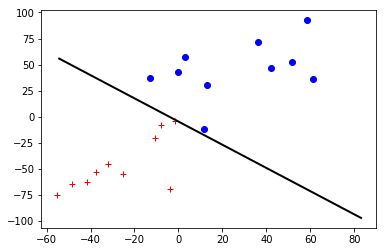

In [9]:
plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'r+')
plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'bo')
plt.plot(np.array([40, 170])-average, np.array([150, -10])-average, 'k-', lw=2)
plt.show()

Learning a seperating hyperplane. First, we visualize a hyperplane 

[-1. -1.]


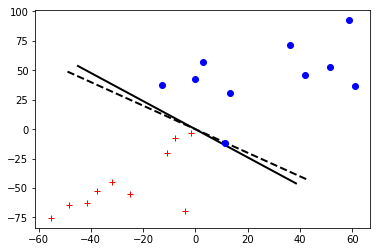

In [10]:
from IPython import display
import time 

def plot_seperating_hyperlane(w):
    print w
    w = w / np.linalg.norm(w)
    t = np.arange(-60.0, 80.0, 10.0)
    plt.plot(w[1]*t, -w[0]*t, 'k--', lw=2)
    plt.plot(-0.64173183*t, 0.76692911*t, 'k', lw=2)
    plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'r+')
    plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'bo')
    plt.show()
    display.clear_output(wait=True)
    time.sleep(10.0)

plot_seperating_hyperlane(np.array([-1.0, -1.0]))

Second, we construct the training data

In [11]:
x = np.row_stack((city_array_centered, forest_array_centered))
x

array([[ 58.67750944,  92.52747693],
       [ 61.06699777,  36.36109839],
       [ 51.63023654,  52.45117466],
       [ 13.13373985,  30.72858376],
       [ 42.01647129,  46.37502332],
       [ 36.12010782,  71.60146866],
       [-12.88855116,  37.50546004],
       [ 11.41819499, -12.16015347],
       [  2.84279725,  57.38211847],
       [ -0.27460183,  42.44503282],
       [ -7.80937524,  -7.62243874],
       [ -1.74619196,  -3.61650129],
       [-55.40629066, -75.36756012],
       [-48.2673979 , -64.61429388],
       [-31.90779692, -44.89345397],
       [-37.56918966, -52.89780813],
       [-25.04628764, -54.70538002],
       [ -3.94982127, -69.24644923],
       [-41.37937777, -62.31628069],
       [-10.66117296, -19.93711751]])

And their labels

In [12]:
y = np.array([-1]*10 + [1]*10)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [13]:
total_examples = len(y)
total_examples

20

The learning algorithm

In [14]:
def perceptron(x, y):
    w = np.zeros(len(x[0]))
    total_iterations = 10
    for iteration in range(total_iterations):
        for i in range(total_examples):
            if np.dot(x[i], w)*y[i] <= 0:
                w = w + x[i]*y[i]
                plot_seperating_hyperlane(w)
    return w

[-81.51389942 -68.20716998]


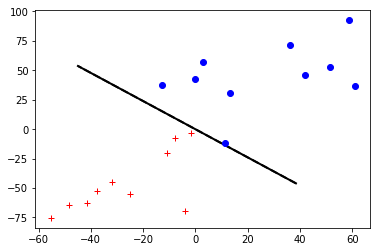

In [15]:
w = perceptron(x,y)

In [17]:
w

array([-81.51389942, -68.20716998])

why this algorithm manages to learn? In each step it improves the predicti
on of mistakes. Teach norm in class 05.